In [13]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
%matplotlib inline

# Data Preparation

In [3]:
districts_df = pd.read_csv('congressional_districts.csv')

In [4]:
districts_df.head()

,Unnamed: 0,CD,Biden,Trump,Total,Percentage_for_Biden,Voting_Age_Population,Voting_Rate
0,0,AK-AL,153778.0,189951.0,357569.0,43.006525,532244.0,67.181406
1,1,AL-1,115683.0,208367.0,327409.0,35.332871,544464.0,60.134187
2,2,AL-2,70484.0,174437.0,247311.0,28.500148,516295.0,47.901103
3,3,AL-3,98663.0,191488.0,293111.0,33.660627,543854.0,53.895163
4,4,AL-4,49904.0,234143.0,286768.0,17.402221,515701.0,55.607416


In [5]:
districts_df.drop(['Unnamed: 0'], axis =1, inplace=True)

In [6]:
districts_df.head()

,CD,Biden,Trump,Total,Percentage_for_Biden,Voting_Age_Population,Voting_Rate
0,AK-AL,153778.0,189951.0,357569.0,43.006525,532244.0,67.181406
1,AL-1,115683.0,208367.0,327409.0,35.332871,544464.0,60.134187
2,AL-2,70484.0,174437.0,247311.0,28.500148,516295.0,47.901103
3,AL-3,98663.0,191488.0,293111.0,33.660627,543854.0,53.895163
4,AL-4,49904.0,234143.0,286768.0,17.402221,515701.0,55.607416


In [7]:
density_df = pd.read_csv('citylab_cdi.csv')

In [8]:
density_df.head()

,CD,Cluster,Very low density,Low density,Medium density,High density
0,AK-AL,Pure rural,0.482993,0.198331,0.229245,0.089431
1,AL-01,Rural-suburban mix,0.365359,0.428878,0.197413,0.008350
2,AL-02,Pure rural,0.535487,0.316148,0.148366,0.000000
3,AL-03,Pure rural,0.540407,0.389348,0.065552,0.004693
4,AL-04,Pure rural,0.695332,0.288942,0.015726,0.000000


In [9]:
districts_df[['Very low density', 'Low density', 'Medium density', 'High density']] = density_df[['Very low density', 'Low density', 'Medium density', 'High density']]

In [10]:
districts_df.head()

,CD,Biden,Trump,Total,Percentage_for_Biden,Voting_Age_Population,Voting_Rate,Very low density,Low density,Medium density,High density
0,AK-AL,153778.0,189951.0,357569.0,43.006525,532244.0,67.181406,0.482993,0.198331,0.229245,0.089431
1,AL-1,115683.0,208367.0,327409.0,35.332871,544464.0,60.134187,0.365359,0.428878,0.197413,0.008350
2,AL-2,70484.0,174437.0,247311.0,28.500148,516295.0,47.901103,0.535487,0.316148,0.148366,0.000000
3,AL-3,98663.0,191488.0,293111.0,33.660627,543854.0,53.895163,0.540407,0.389348,0.065552,0.004693
4,AL-4,49904.0,234143.0,286768.0,17.402221,515701.0,55.607416,0.695332,0.288942,0.015726,0.000000


In [11]:
districts_df['Election_Result'] = np.where(districts_df['Percentage_for_Biden']>=50.0, 'Biden', 'Trump')

In [12]:
districts_df.head()

,CD,Biden,Trump,Total,Percentage_for_Biden,Voting_Age_Population,Voting_Rate,Very low density,Low density,Medium density,High density,Election_Result
0,AK-AL,153778.0,189951.0,357569.0,43.006525,532244.0,67.181406,0.482993,0.198331,0.229245,0.089431,Trump
1,AL-1,115683.0,208367.0,327409.0,35.332871,544464.0,60.134187,0.365359,0.428878,0.197413,0.008350,Trump
2,AL-2,70484.0,174437.0,247311.0,28.500148,516295.0,47.901103,0.535487,0.316148,0.148366,0.000000,Trump
3,AL-3,98663.0,191488.0,293111.0,33.660627,543854.0,53.895163,0.540407,0.389348,0.065552,0.004693,Trump
4,AL-4,49904.0,234143.0,286768.0,17.402221,515701.0,55.607416,0.695332,0.288942,0.015726,0.000000,Trump


# Exploratory Data Analysis

The purpose here is to determine if there is a correlation between congressional district density and if so if the election result can be predicted using a machine learning model.

In [15]:
# preparing a dataframe of just the congressional district demographic information
eda_df = districts_df[['CD', 'Voting_Age_Population', 'Very low density', 'Low density', 'Medium density', 'High density', 'Election_Result']]

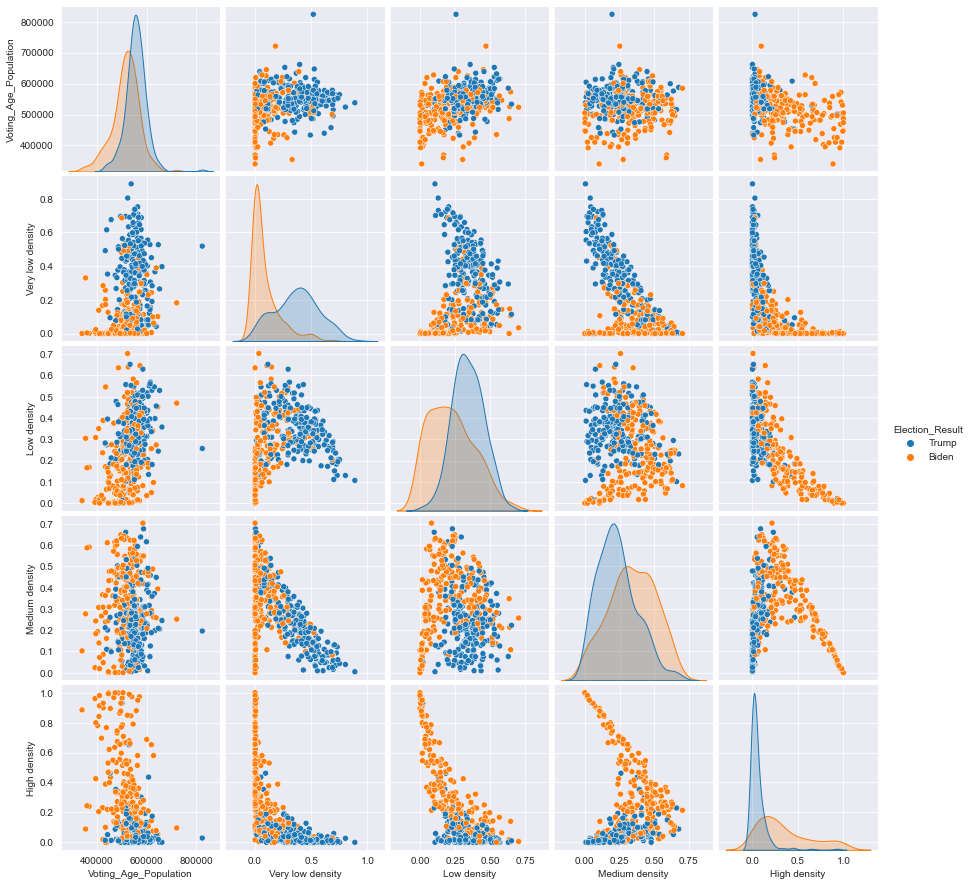

In [17]:
sns.pairplot(eda_df, hue='Election_Result')

There appears to be a separation between the election result based on the congressional district density characteristcis, which can be taken advantage of.

# Train Test Split

In [18]:
from sklearn.model_selection import train_test_split

In [21]:
X = eda_df[['Voting_Age_Population', 'Very low density', 'Low density', 'Medium density', 'High density']]
y = eda_df['Election_Result']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Support Vector Machines

In [22]:
from sklearn.svm import SVC

In [23]:
model = SVC()

In [24]:
model.fit(X_train,y_train)

SVC()

In [25]:
predictions = model.predict(X_test)

In [26]:
from sklearn.metrics import classification_report, confusion_matrix

In [27]:
print(confusion_matrix(y_test, predictions))

print(classification_report(y_test, predictions))

[[48 22]
 [19 55]]
              precision    recall  f1-score   support

       Biden       0.72      0.69      0.70        70
       Trump       0.71      0.74      0.73        74

    accuracy                           0.72       144
   macro avg       0.72      0.71      0.71       144
weighted avg       0.72      0.72      0.71       144



Accuracy of 72%

## Adjust parameters of SVC grid search

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
param_grid = {'C': [0.1, 1, 10, 100, 1000, 10000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 0.00001]}

In [38]:
grid = GridSearchCV(SVC(), param_grid, verbose=3)

In [39]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.508 total time=   0.0s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.517 total time=   0.0s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.517 total time=   0.0s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.517 total time=   0.0s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.517 total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.508 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.517 total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.517 total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.517 total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.517 total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.508 total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=0.01

[CV 3/5] END ................C=100, gamma=0.001;, score=0.517 total time=   0.0s
[CV 4/5] END ................C=100, gamma=0.001;, score=0.534 total time=   0.0s
[CV 5/5] END ................C=100, gamma=0.001;, score=0.483 total time=   0.0s
[CV 1/5] END ...............C=100, gamma=0.0001;, score=0.475 total time=   0.0s
[CV 2/5] END ...............C=100, gamma=0.0001;, score=0.466 total time=   0.0s
[CV 3/5] END ...............C=100, gamma=0.0001;, score=0.638 total time=   0.0s
[CV 4/5] END ...............C=100, gamma=0.0001;, score=0.534 total time=   0.0s
[CV 5/5] END ...............C=100, gamma=0.0001;, score=0.466 total time=   0.0s
[CV 1/5] END ................C=100, gamma=1e-05;, score=0.525 total time=   0.0s
[CV 2/5] END ................C=100, gamma=1e-05;, score=0.569 total time=   0.0s
[CV 3/5] END ................C=100, gamma=1e-05;, score=0.586 total time=   0.0s
[CV 4/5] END ................C=100, gamma=1e-05;, score=0.621 total time=   0.0s
[CV 5/5] END ...............

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000, 10000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 1e-05]},
             verbose=3)

In [40]:
grid.best_params_

{'C': 1, 'gamma': 1e-05}

In [41]:
grid.best_estimator_

SVC(C=1, gamma=1e-05)

In [42]:
grid_predictions = grid.predict(X_test)

In [43]:
print(confusion_matrix(y_test, grid_predictions))
print(classification_report(y_test, grid_predictions))

[[52 18]
 [36 38]]
              precision    recall  f1-score   support

       Biden       0.59      0.74      0.66        70
       Trump       0.68      0.51      0.58        74

    accuracy                           0.62       144
   macro avg       0.63      0.63      0.62       144
weighted avg       0.64      0.62      0.62       144



In [44]:
# Optimizing the SVC grid resulted in worse results. Implies support vector machine is not an appropriate method.

# Decision Trees

In [45]:
from sklearn.tree import DecisionTreeClassifier

In [46]:
dtree = DecisionTreeClassifier()

In [47]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [48]:
predictions = dtree.predict(X_test)

In [49]:
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[59 11]
 [17 57]]
              precision    recall  f1-score   support

       Biden       0.78      0.84      0.81        70
       Trump       0.84      0.77      0.80        74

    accuracy                           0.81       144
   macro avg       0.81      0.81      0.81       144
weighted avg       0.81      0.81      0.81       144



Accuracy of 81%. Surprisingly good.

# Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
rfc = RandomForestClassifier(n_estimators=200)

In [52]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [53]:
rfc_predictions = rfc.predict(X_test)

In [54]:
print(confusion_matrix(y_test, rfc_predictions))
print(classification_report(y_test, rfc_predictions))

[[58 12]
 [12 62]]
              precision    recall  f1-score   support

       Biden       0.83      0.83      0.83        70
       Trump       0.84      0.84      0.84        74

    accuracy                           0.83       144
   macro avg       0.83      0.83      0.83       144
weighted avg       0.83      0.83      0.83       144



Accuracy of 83%

# K-Nearest Neighbor

In [55]:
from sklearn.preprocessing import StandardScaler

In [56]:
scaler = StandardScaler()

In [57]:
scaler.fit(eda_df[['Voting_Age_Population', 'Very low density', 'Low density', 'Medium density', 'High density']])

StandardScaler()

In [58]:
scaled_features = scaler.transform(eda_df[['Voting_Age_Population', 'Very low density', 'Low density', 'Medium density', 'High density']])

In [59]:
scaled_features

array([[-0.06589581,  1.18343036, -0.56258848, -0.35792958, -0.43408403],
       [ 0.16565633,  0.64142343,  0.97002133, -0.5532421 , -0.74314487],
       [-0.36810735,  1.42530081,  0.22062387, -0.85418875, -0.774973  ],
       ...,
       [-0.91926587,  1.26684919,  0.65863361, -1.1060776 , -0.73855928],
       [-1.4798608 ,  2.07282293, -0.46891974, -1.1610243 , -0.7246589 ],
       [-1.93422976,  1.22493028, -0.00329281, -0.46524802, -0.72244152]])

In [60]:
eda_scaled = pd.DataFrame(data=scaled_features, columns = ['Voting_Age_Population', 'Very low density', 'Low density', 'Medium density', 'High density'])

In [61]:
eda_scaled.head()

,Voting_Age_Population,Very low density,Low density,Medium density,High density
0,-0.065896,1.183430,-0.562588,-0.357930,-0.434084
1,0.165656,0.641423,0.970021,-0.553242,-0.743145
2,-0.368107,1.425301,0.220624,-0.854189,-0.774973
3,0.154098,1.447973,0.707237,-1.362314,-0.757085
4,-0.379363,2.161802,0.039764,-1.668035,-0.774973


In [64]:
X = eda_scaled

y = eda_df['Election_Result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [65]:
from sklearn.neighbors import KNeighborsClassifier

In [66]:
KNN = KNeighborsClassifier(n_neighbors=1)

In [67]:
KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [68]:
pred = KNN.predict(X_test)

In [69]:
pred

array(['Biden', 'Trump', 'Biden', 'Trump', 'Trump', 'Biden', 'Trump',
       'Trump', 'Biden', 'Trump', 'Biden', 'Biden', 'Biden', 'Biden',
       'Trump', 'Biden', 'Trump', 'Biden', 'Biden', 'Biden', 'Trump',
       'Trump', 'Trump', 'Biden', 'Trump', 'Biden', 'Trump', 'Biden',
       'Trump', 'Biden', 'Trump', 'Biden', 'Biden', 'Biden', 'Trump',
       'Trump', 'Trump', 'Biden', 'Biden', 'Biden', 'Biden', 'Trump',
       'Biden', 'Biden', 'Biden', 'Trump', 'Trump', 'Biden', 'Biden',
       'Trump', 'Trump', 'Trump', 'Trump', 'Biden', 'Biden', 'Trump',
       'Biden', 'Biden', 'Biden', 'Biden', 'Trump', 'Trump', 'Biden',
       'Trump', 'Trump', 'Biden', 'Trump', 'Trump', 'Trump', 'Biden',
       'Trump', 'Trump', 'Trump', 'Trump', 'Biden', 'Biden', 'Trump',
       'Trump', 'Biden', 'Trump', 'Trump', 'Biden', 'Trump', 'Biden',
       'Biden', 'Trump', 'Trump', 'Trump', 'Trump', 'Biden', 'Trump',
       'Trump', 'Biden', 'Biden', 'Biden', 'Trump', 'Biden', 'Trump',
       'Trump', 'Tru

In [70]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[49 19]
 [16 47]]
              precision    recall  f1-score   support

       Biden       0.75      0.72      0.74        68
       Trump       0.71      0.75      0.73        63

    accuracy                           0.73       131
   macro avg       0.73      0.73      0.73       131
weighted avg       0.73      0.73      0.73       131



Accuracy of 73%.